In [136]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-quality-database-from-cqi/merged_data_cleaned.csv
/kaggle/input/coffee-quality-database-from-cqi/arabica_data_cleaned.csv
/kaggle/input/coffee-quality-database-from-cqi/robusta_data_cleaned.csv


In [137]:
data=pd.read_csv("../input/coffee-quality-database-from-cqi/merged_data_cleaned.csv")
data.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1182 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

In [139]:
data.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [140]:
data=data[['Species','Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture']]

In [141]:
pip install klib

  Using cached pandas-1.2.2-cp37-cp37m-manylinux1_x86_64.whl (9.9 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.8 requires pandas==1.0.5, but you have pandas 1.2.2 which is incompatible.
autogluon-core 0.1.0b20210210 requires numpy==1.19, but you have numpy 1.19.1 which is incompatible.
autogluon-core 0.1.0b20210210 requires scipy<1.5.0,>=1.3.3, but you have scipy 1.6.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [142]:
import klib
klib.missingval_plot(data)

No missing values found in the dataset.


# EDA

In [143]:
data

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture
0,Arabica,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12
1,Arabica,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12
2,Arabica,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00
3,Arabica,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11
4,Arabica,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00
1335,Robusta,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00
1336,Robusta,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00
1337,Robusta,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10


In [144]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Aroma,1339.00,7.57,0.38,0.00,7.42,7.58,7.75,8.75
Flavor,1339.00,7.52,0.40,0.00,7.33,7.58,7.75,8.83
Aftertaste,1339.00,7.40,0.40,0.00,7.25,7.42,7.58,8.67
Acidity,1339.00,7.54,0.38,0.00,7.33,7.58,7.75,8.75
Body,1339.00,7.52,0.37,0.00,7.33,7.50,7.67,8.58
Balance,1339.00,7.52,0.41,0.00,7.33,7.50,7.75,8.75
Uniformity,1339.00,9.83,0.55,0.00,10.00,10.00,10.00,10.00
Clean.Cup,1339.00,9.84,0.76,0.00,10.00,10.00,10.00,10.00
Sweetness,1339.00,9.86,0.62,0.00,10.00,10.00,10.00,10.00
Cupper.Points,1339.00,7.50,0.47,0.00,7.25,7.50,7.75,10.00


In [145]:
import plotly.express as px
px.scatter(data,x='Aftertaste',y='Flavor', color='Species')

Aftertaste and Flavor has in a same crowded position

In [146]:
px.box(data, x='Species', y='Flavor', color='Species')

In [147]:
px.scatter_3d(data, x='Flavor', y='Aroma', z='Aftertaste', color='Species')

Arabica has crowded in high posisition different with Robusta tend spreading in lower value of those variable.

In [148]:
px.line(data, x=data.index, y=['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture'])

Let's drop the bad value

In [149]:
data=data.drop(data.index[1310])
data

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture
0,Arabica,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12
1,Arabica,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12
2,Arabica,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00
3,Arabica,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11
4,Arabica,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00
1335,Robusta,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00
1336,Robusta,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00
1337,Robusta,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10


In [150]:
px.line(data, x=data.index, y=['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture'])

In [151]:
import plotly.express as px
px.scatter(data,x='Aftertaste',y='Flavor', color='Species')

In [152]:
import plotly.express as px
px.scatter(data,x='Aroma',y='Flavor', color='Species')

In [153]:
px.scatter_3d(data, x='Flavor', y='Aroma', z='Aftertaste', color='Species')

In [154]:
data.columns

Index(['Species', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture'],
      dtype='object')

# Do the Correlation to choose some fatures

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

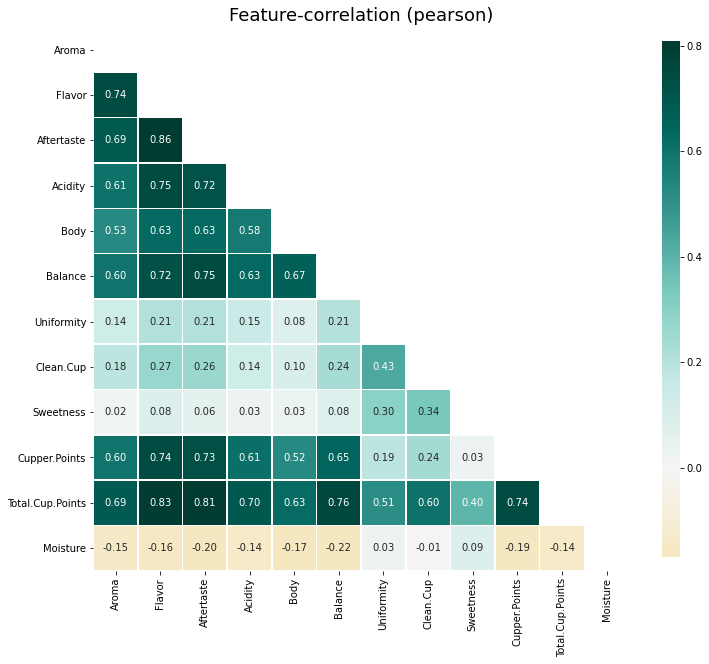

In [155]:
klib.corr_plot(data, annot=True)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

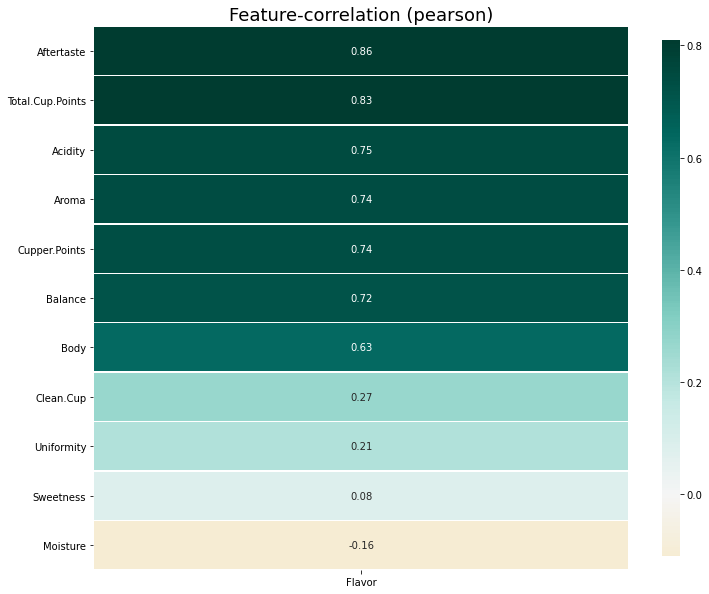

In [156]:
klib.corr_plot(data, target='Flavor',annot=True)

# Regression

In [157]:
data

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture
0,Arabica,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12
1,Arabica,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12
2,Arabica,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00
3,Arabica,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11
4,Arabica,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00
1335,Robusta,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00
1336,Robusta,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00
1337,Robusta,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10


In [158]:
Y=data.Flavor
X=data.drop(['Flavor','Species','Moisture'], axis=1)

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=10)

In [160]:
pip install lazypredict

  Using cached pandas-1.0.5-cp37-cp37m-manylinux1_x86_64.whl (10.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.2
    Uninstalling pandas-1.2.2:
      Successfully uninstalled pandas-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.7.1 requires pandas>=1.1.0, but you have pandas 1.0.5 which is incompatible.
osmnx 1.0.1 requires pandas>=1.1, but you have pandas 1.0.5 which is incompatible.
mizani 0.7.2 requires pandas>=1.1.0, but you have pandas 1.0.5 which is incompatible.
klib 0.1.5 requires pandas>=1.1, but you have pandas 1.0.5 which is incompatible.
autogluon-core 0.1.0b20210210 requires numpy==1.19, but you have numpy 1.19.1 which is incompatible.
autogluon-core 0.1.0b20210210 requires scipy<1.5.0,>=1.3.3, but you have scipy 1.6.0 which is incompatible.
Note: you may need to restart the kernel to use update

In [161]:
from lazypredict.Supervised import LazyRegressor

In [162]:
reg=LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)

In [163]:
X_test

,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points
7,8.25,8.50,8.42,8.33,8.50,10.00,10.00,9.33,9.00,88.67
999,7.42,7.08,7.33,7.25,7.58,10.00,10.00,10.00,7.25,81.00
1209,7.25,6.83,7.00,7.17,7.00,10.00,10.00,10.00,6.67,78.75
491,7.33,7.58,7.92,7.67,7.58,10.00,10.00,10.00,7.42,83.08
625,7.83,7.83,7.33,7.58,7.83,10.00,10.00,9.33,7.58,82.67
...,...,...,...,...,...,...,...,...,...,...
271,7.67,7.58,7.67,7.75,7.83,10.00,10.00,10.00,7.67,83.92
695,7.75,7.25,7.58,7.58,7.33,10.00,10.00,10.00,7.58,82.42
1039,7.50,7.00,7.42,7.17,7.17,10.00,10.00,10.00,7.17,80.75
323,8.00,7.33,8.00,8.00,8.00,9.33,10.00,10.00,7.50,83.67


In [164]:
train, test=reg.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:07<00:00,  5.59it/s]


In [165]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,1.00,1.00,0.01,0.35
RANSACRegressor,1.00,1.00,0.01,0.03
LinearSVR,1.00,1.00,0.01,0.12
LassoLarsIC,1.00,1.00,0.01,0.04
LassoLarsCV,1.00,1.00,0.01,0.15
TransformedTargetRegressor,1.00,1.00,0.01,0.02
LinearRegression,1.00,1.00,0.01,0.02
BayesianRidge,1.00,1.00,0.01,0.06
RidgeCV,1.00,1.00,0.01,0.03


In [166]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,1.00,1.00,0.01,0.35
RANSACRegressor,1.00,1.00,0.01,0.03
LinearSVR,1.00,1.00,0.01,0.12
LassoLarsIC,1.00,1.00,0.01,0.04
LassoLarsCV,1.00,1.00,0.01,0.15
TransformedTargetRegressor,1.00,1.00,0.01,0.02
LinearRegression,1.00,1.00,0.01,0.02
BayesianRidge,1.00,1.00,0.01,0.06
RidgeCV,1.00,1.00,0.01,0.03


Linier Regression has enough RMSE and R-Squared

In [167]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
Y_pred

array([8.34323112, 7.09180329, 6.82993249, 7.5797405 , 7.3619471 ,
       7.75824227, 7.83611531, 7.68061541, 7.66885414, 7.40915572,
       7.91467732, 7.8402483 , 7.66822095, 7.58381148, 7.49908283,
       7.74983473, 6.9228625 , 7.33948637, 7.98876854, 7.49706327,
       7.99907852, 7.84232378, 8.16028111, 7.58956011, 6.73953361,
       6.99637187, 7.75064887, 7.75485847, 7.41919869, 7.50988865,
       6.74964641, 7.24329768, 7.33921249, 7.83671088, 7.08084586,
       7.66925475, 7.66033422, 8.17685499, 7.66808115, 7.85147855,
       7.41064512, 7.83616396, 7.58661891, 7.66680372, 7.40172372,
       7.42971882, 7.17063896, 7.43075413, 7.49949587, 7.65819962,
       7.74042195, 7.26252397, 7.58825285, 8.07816965, 7.58956689,
       7.65064939, 8.25516571, 7.41868325, 7.32971394, 7.07975353,
       7.57936015, 7.83475382, 7.58055604, 7.57792476, 7.16251777,
       7.74728146, 7.75004017, 7.6655395 , 7.41794541, 7.33493494,
       7.342972  , 6.50661692, 7.158714  , 7.65541764, 7.74756

In [168]:
from sklearn.metrics import mean_squared_error as MSE

In [169]:
print('MSE Value is',MSE(Y_pred, Y_test))

MSE Value is 8.320148767420488e-05


In [170]:
import decimal
tmp = decimal.Decimal(MSE(Y_pred, Y_test))
tmp

Decimal('0.000083201487674204884057056752499903495845501311123371124267578125')

It has a good MSE.

# Classification

In [171]:
data

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture
0,Arabica,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12
1,Arabica,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12
2,Arabica,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00
3,Arabica,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11
4,Arabica,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00
1335,Robusta,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00
1336,Robusta,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00
1337,Robusta,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10


In [172]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["Species_Code"] = ord_enc.fit_transform(data[["Species"]])
data[["Species_Code", "Species"]].tail(11)
data['Species']=data
data

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Species_Code
0,Arabica,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0.00
1,Arabica,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0.00
2,Arabica,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0.00
3,Arabica,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0.00
4,Arabica,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,1.00
1335,Robusta,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,1.00
1336,Robusta,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,1.00
1337,Robusta,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,1.00


In [173]:
Y=data.Species_Code
X=data.drop(['Species','Species_Code','Moisture'], axis=1)

In [174]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=1)

In [175]:
from lazypredict.Supervised import LazyClassifier
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
train, test=clf.fit(X_train, X_test, Y_train, Y_test)

#Show Comparison data train
train

100%|██████████| 29/29 [00:01<00:00, 17.10it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,1.00,1.00,1.00,1.00,0.06
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.02
SVC,1.00,1.00,1.00,1.00,0.04
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.18
AdaBoostClassifier,0.99,1.00,1.00,0.99,0.16
GaussianNB,0.99,1.00,1.00,0.99,0.02
PassiveAggressiveClassifier,0.99,1.00,1.00,0.99,0.03
KNeighborsClassifier,0.99,1.00,1.00,0.99,0.03
LinearSVC,0.99,1.00,1.00,0.99,0.06


In [176]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
model=RF.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
Y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy value is', accuracy_score(Y_pred,Y_test))

Accuracy value is 0.9925373134328358


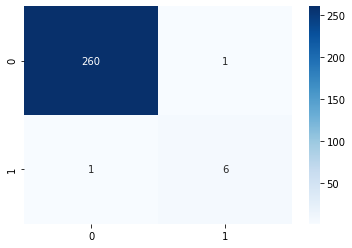

In [178]:
import seaborn as sns
_=sns.heatmap(confusion_matrix(Y_pred, Y_test), annot=True, fmt='g', cmap='Blues')

The Score is 99.25%

Thank you. Don't forget to upvote.